# Monomial gamma HMC

In [1]:
from utils import *
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import pints.plot
from pints.functionaltests.monomial_gamma_hamiltonian import *

# Two dimensional Gaussian

In [2]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_monomial_gamma_hamiltonian_on_two_dim_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_2d_gaussian.csv")

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


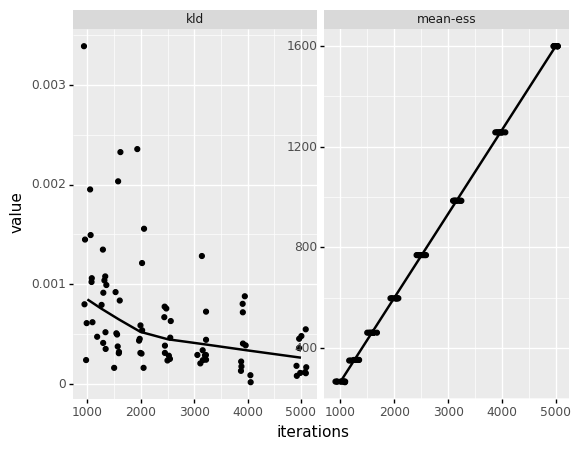

<ggplot: (8767820895856)>

In [3]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The ESS and KLD both trend in the correct directions.

Show example run results.

Using Monomial-Gamma Hamiltonian Monte Carlo
Generating 4 chains.
Running in sequential mode.


/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:02.5
1     84     0.333     0.333     0.333     0.333      0:02.5
2     164    0.5       0.5       0.5       0.5        0:02.5
3     244    0.6       0.6       0.6       0.6        0:02.5
20    1604   0.864     0.773     0.909     0.864      0:02.5
40    3204   0.929     0.857     0.952381  0.929      0:02.6
60    4804   0.952     0.903     0.968     0.952      0:02.7
80    6404   0.963     0.927     0.976     0.963      0:02.8
100   8004   0.971     0.941     0.98      0.971      0:02.9
120   9604   0.975     0.951     0.984     0.967      0:03.0
140   11204  0.979     0.958     0.986     0.971831   0:03.1
160   12804  0.981     0.962963  0.988     0.975      0:03.2
180   14404  0.984     0.967033  0.984     0.978022   0:03.3
200   16004  0.985     0.970297  0.985     0.980198   0:03.4
220   17604  0.986     0.972973  0.986     0.981982   0:03.5
240   19204  0.988     0

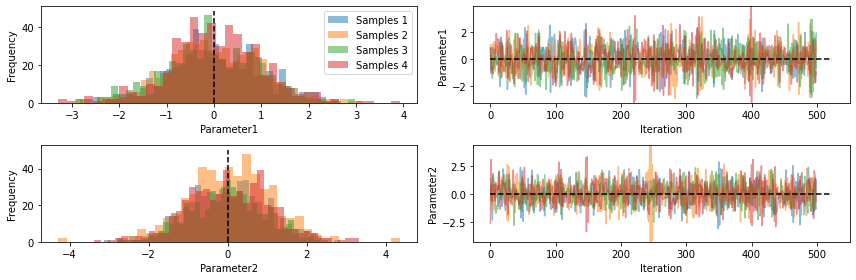

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess     ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  ------  --------------
param 1  0.00    1.00    -2.04   -0.63  -0.04  0.70   2.00     1.00    666.67  94.41
param 2  0.02    1.02    -1.93   -0.70  0.03   0.73   1.99     1.00    655.32  92.80


In [4]:
n_chains = 4
n_iterations = 1000
n_warmup = 500
log_pdf = pints.toy.GaussianLogPDF(mean=[0, 0], sigma=[1, 1])

# Get initial parameters
log_prior = pints.ComposedLogPrior(
    pints.GaussianLogPrior(mean=0, sd=10),
    pints.GaussianLogPrior(mean=0, sd=10))
x0 = log_prior.sample(n=n_chains)
controller = pints.MCMCController(
            log_pdf, n_chains, x0, method=pints.MonomialGammaHamiltonianMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(True)

for sampler in controller.samplers():
    sampler.set_leapfrog_step_size(1)
    sampler.set_a(0.5)

chains = controller.run()
chains = chains[:, n_warmup:]

# Show traces and histograms
pints.plot.trace(chains, ref_parameters=[0, 0])

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

The parameters are close to their true means. How do they compare to MCMC eCDFs compare with the theoretical? Look pretty good.

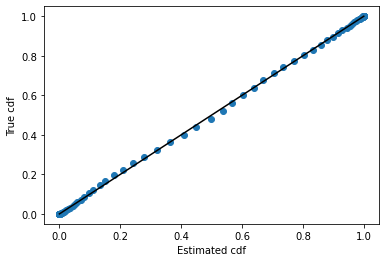

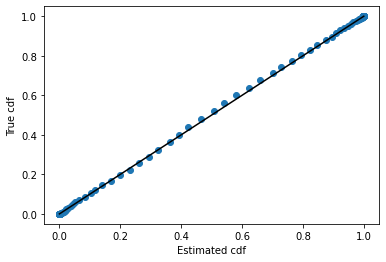

[None, None]

In [5]:
draws = np.vstack(chains)
[ecdf_norm_plotter(draws[:, i], 1) for i in range(2)]

# Correlated Gaussian

In [6]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_monomial_gamma_hamiltonian_on_correlated_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_correlated_gaussian.csv")

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


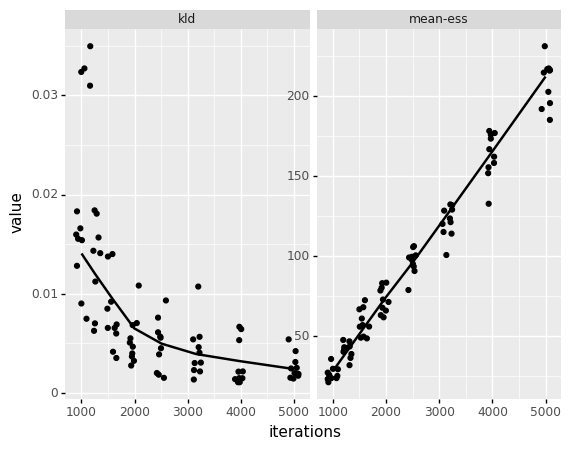

<ggplot: (8767819332265)>

In [7]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Example run of results.

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


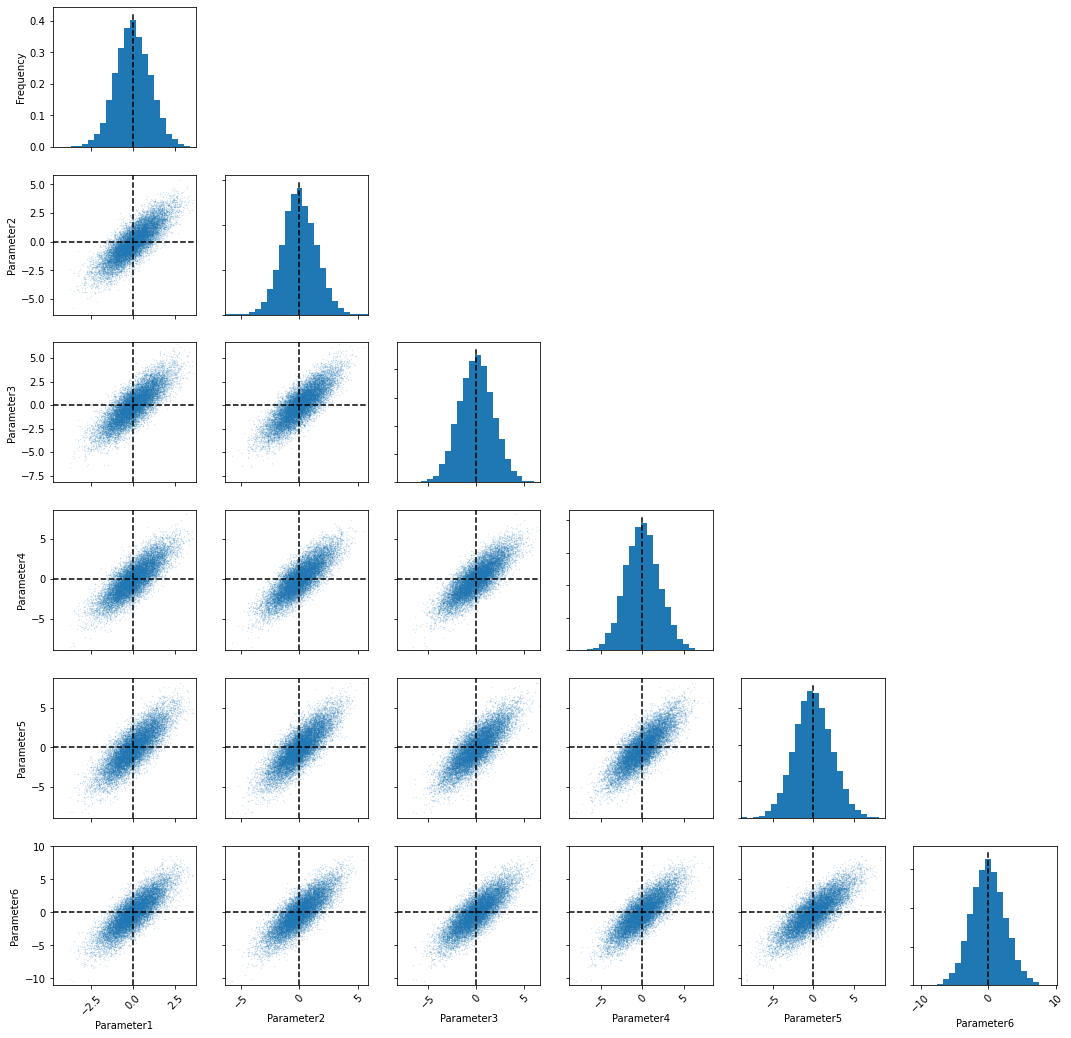

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess     ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  ------  --------------
param 1  -0.01   1.02    -1.99   -0.69  -0.03  0.68   2.00     1.01    694.39  23.57
param 2  -0.01   1.44    -2.79   -0.97  -0.04  0.95   2.84     1.01    695.46  23.61
param 3  -0.01   1.77    -3.42   -1.21  -0.01  1.17   3.48     1.01    687.49  23.34
param 4  -0.00   2.04    -3.94   -1.41  -0.03  1.33   4.06     1.01    657.06  22.30
param 5  -0.02   2.29    -4.49   -1.56  -0.06  1.52   4.53     1.01    617.66  20.97
param 6  -0.02   2.50    -4.93   -1.70  -0.05  1.63   4.98     1.01    633.54  21.51


In [8]:
n_chains = 4
n_iterations = 4000
n_warmup = 500

log_pdf = pints.toy.HighDimensionalGaussianLogPDF(dimension=6, rho=0.8)
x0 = np.random.uniform(-4, 4, size=(n_chains, 6))
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.MonomialGammaHamiltonianMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

for sampler in controller.samplers():
    sampler.set_leapfrog_step_size(1)
    sampler.set_a(0.5)

chains = controller.run()
chains = chains[:, n_warmup:]

# Show traces and histograms
pints.plot.pairwise(np.vstack(chains), kde=False, ref_parameters=([0] * 6))

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

Again the estimated means compare well with the theoretical. Now comparing the theoretical and empirical cdfs: again, these look fine.

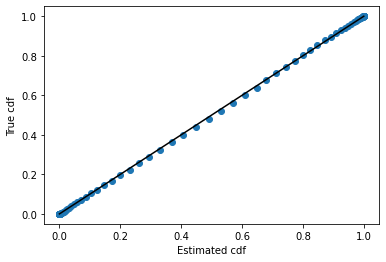

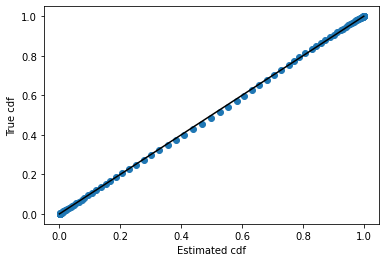

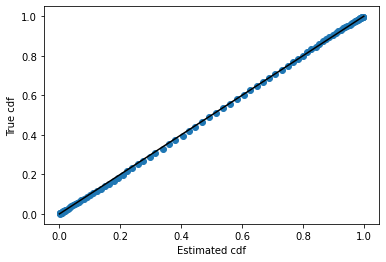

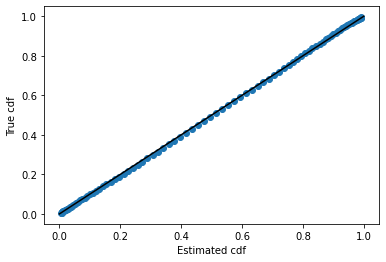

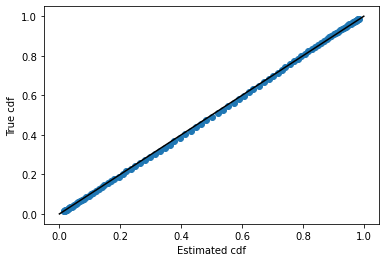

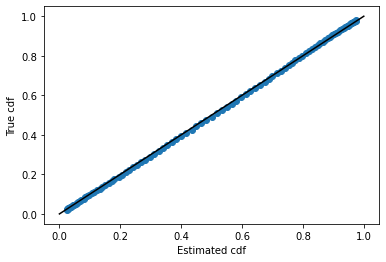

[None, None, None, None, None, None]

In [9]:
draws = np.vstack(chains)
[ecdf_norm_plotter(draws[:, i], np.sqrt(i + 1)) for i in range(6)]

# Banana

In [10]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10, test_monomial_gamma_hamiltonian_on_banana)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_banana.csv")

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


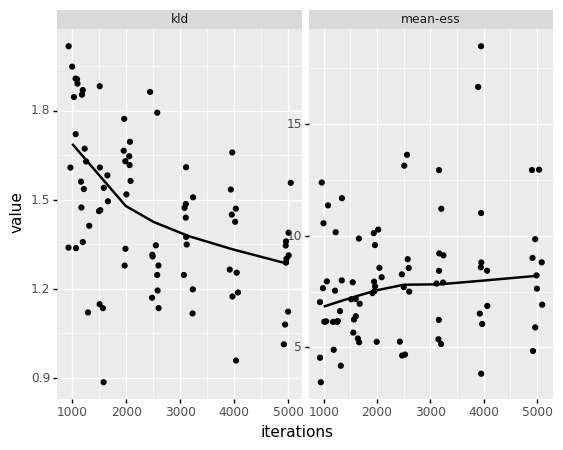

<ggplot: (8767812062461)>

In [11]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The banana is a hard problem with a low ESS. But the KLD is moving in the right direction.

Example run of results.

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


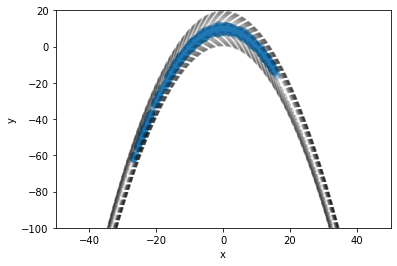

In [12]:
n_chains = 4
n_iterations = 1000
n_warmup = 500

log_pdf = pints.toy.TwistedGaussianLogPDF(dimension=2, b=0.1)
log_prior = pints.MultivariateGaussianLogPrior([0, 0],
                                               [[10, 0], [0, 10]])
x0 = log_prior.sample(n_chains)
sigma0 = np.diag(np.array([1, 3]))

levels = np.linspace(-50, -1, 20)
x = np.linspace(-50, 50, 250)
y = np.linspace(-100, 20, 250)
X, Y = np.meshgrid(x, y)
Z = [[log_pdf([i, j]) for i in x] for j in y]

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.MonomialGammaHamiltonianMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

for sampler in controller.samplers():
    sampler.set_leapfrog_step_size(1)
    sampler.set_a(0.5)

chains = controller.run()
chains = np.vstack(chains[:, n_warmup:])

plt.contour(X, Y, Z, levels=levels, colors='k', alpha=0.2)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.2)
plt.xlim(-50, 50)
plt.ylim(-100, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Annulus

In [13]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_monomial_gamma_hamiltonian_on_annulus)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_annulus.csv")

/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


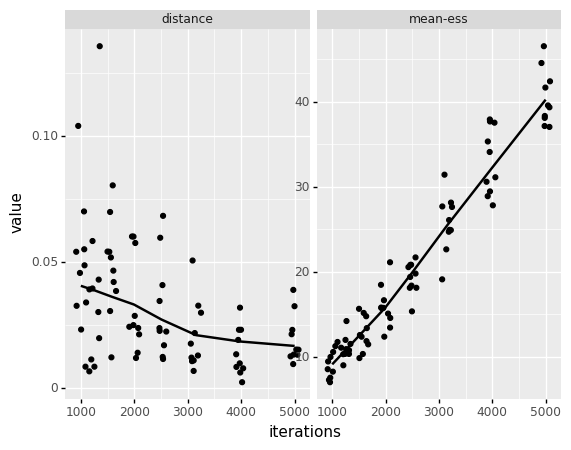

<ggplot: (8767811829586)>

In [14]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

The draws trend closer to convergence as the number of iterations increases, although the effective sample size is low here.

Example run.

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


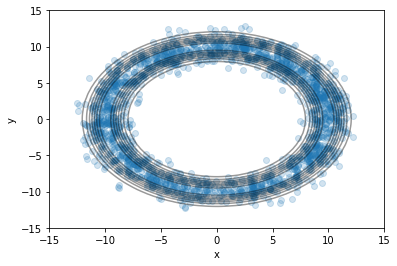

In [15]:
n_chains = 4
n_iterations = 1000
n_warmup = 500

log_pdf = pints.toy.AnnulusLogPDF()
x0 = log_pdf.sample(n_chains)

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.MonomialGammaHamiltonianMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

for sampler in controller.samplers():
    sampler.set_leapfrog_step_size(1)
    sampler.set_a(0.5)

chains = controller.run()
chains = np.vstack(chains[:, n_warmup:])

num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.4)
plt.scatter(chains[:, 0], chains[:, 1], alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Multimodal Gaussian

In [16]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_monomial_gamma_hamiltonian_on_multimodal_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_multimodal_gaussian.csv")

# remove high values of kld to see general trend
test1 = test.query('kld < 1')
df1 = pd.melt(test1, id_vars=['iterations', 'replicate'])

/home/michael/dev/pints/pints/toy/_multimodal_gaussian.py:167: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/lib64/python3.9/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib64/python3.9/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
/usr/lib64/python3.9/site-packages/numpy/linalg/linalg.py:2159: RuntimeWarning: invalid value encountered in det


/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


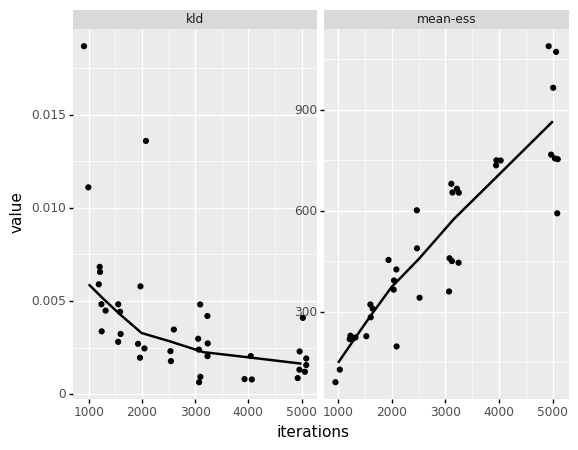

<ggplot: (8767811788014)>

In [17]:
(ggplot(df1,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

With the few outliers removed, the KLD appears to be moving in the correct direction as iterations increase.

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


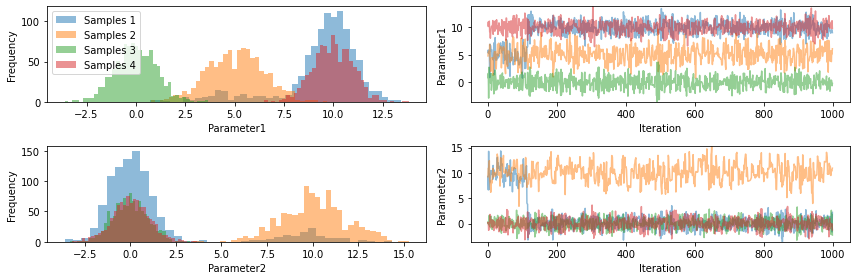

param    mean    std.    2.5%    25%    50%    75%    97.5%    rhat    ess     ess per sec.
-------  ------  ------  ------  -----  -----  -----  -------  ------  ------  --------------
param 1  6.11    4.25    -1.36   2.04   6.86   9.91   11.60    3.25    927.87  56.03
param 2  2.81    4.68    -1.83   -0.40  0.52   7.89   12.51    2.60    850.34  51.35


In [18]:
n_chains = 4
n_iterations = 1000
n_warmup = 500

covariances = [[[1, 0], [0, 1]],
               [[2, 0.8], [0.8, 3]],
               [[1, -0.5], [-0.5, 1]]]
log_pdf = pints.toy.MultimodalGaussianLogPDF(modes=[[0, 0], [5, 10], [10, 0]],
                                             covariances=covariances)
x0 = log_pdf.sample(n_chains)

# run model
controller = pints.MCMCController(
            log_pdf, n_chains, x0, sigma0=None, method=pints.MonomialGammaHamiltonianMCMC)
controller.set_max_iterations(n_iterations)
controller.set_log_to_screen(False)

for sampler in controller.samplers():
    sampler.set_leapfrog_step_size(1)
    sampler.set_a(0.5)

chains = controller.run()

pints.plot.trace(chains)

# Show graphs
plt.show()

results = pints.MCMCSummary(chains=chains, time=controller.time())
print(results)

Clearly this multimodal distribution requires many draws to reach convergence.

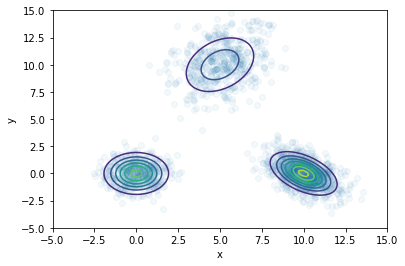

In [19]:
samples = np.vstack(chains[:, n_warmup:])

num_points = 100
x = np.linspace(-5, 15, num_points)
y = np.linspace(-5, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z)
plt.scatter(samples[:,0], samples[:,1], alpha=0.05)
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Cone

In [20]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_monomial_gamma_hamiltonian_on_cone)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_cone.csv")

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


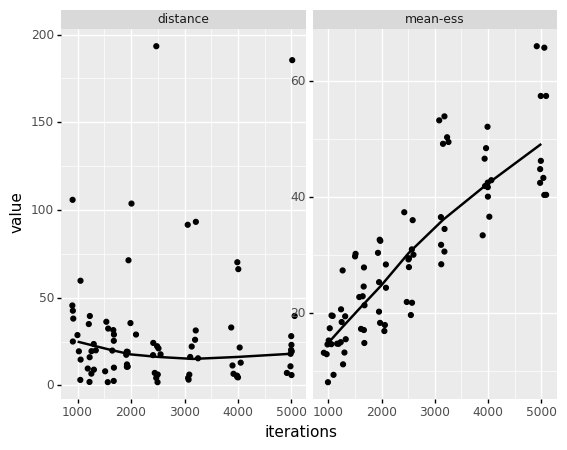

<ggplot: (8767819308285)>

In [21]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))

Again, the cone problem, with its long tails, is really hard.

Now showing an example run.

Running...
Using Monomial-Gamma Hamiltonian Monte Carlo
Generating 4 chains.
Running in sequential mode.


/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


Iter. Eval. Accept.   Accept.   Accept.   Accept.   Time m:s
0     4      0         0         0         0          0:02.5
1     84     0.333     0.333     0.333     0.333      0:02.5
2     164    0.5       0.5       0.5       0.5        0:02.5
3     244    0.6       0.6       0.6       0.6        0:02.5
20    1604   0.864     0.864     0.864     0.909      0:02.5
40    3204   0.929     0.905     0.929     0.952381   0:02.6
60    4804   0.952     0.935     0.935     0.968      0:02.7
80    6404   0.951     0.951     0.951     0.939      0:02.8
100   8004   0.961     0.961     0.961     0.941      0:02.9
120   9604   0.967     0.959     0.967     0.951      0:03.0
140   11204  0.971831  0.965     0.965     0.958      0:03.0
160   12804  0.975     0.969     0.969     0.962963   0:03.1
180   14404  0.967033  0.973     0.973     0.967033   0:03.2
200   16004  0.960396  0.975     0.975     0.970297   0:03.3
220   17604  0.959     0.968     0.977     0.972973   0:03.4
240   19204  0.963     0

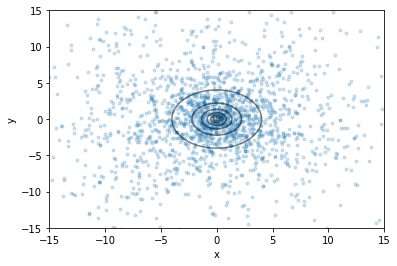

True normed mean = 8.638816024714002
Sample normed mean = 8.595709511165547
True normed var = 65.40423915068341
Sample normed var = 62.19619949793788


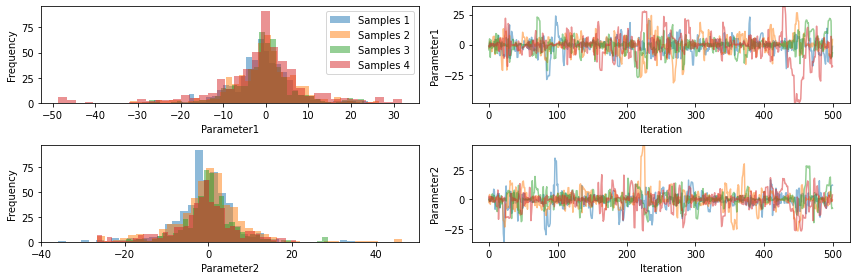

In [22]:
nchains = 4
log_pdf = pints.toy.ConeLogPDF(dimensions=2, beta=0.6)
x0 = log_pdf.sample(nchains)
mcmc = pints.MCMCController(log_pdf, nchains, x0, method=pints.MonomialGammaHamiltonianMCMC)

# Set maximum number of iterations
mcmc.set_max_iterations(1000)

# Disable logging
mcmc.set_log_to_screen(True)

for sampler in mcmc.samplers():
    sampler.set_leapfrog_step_size(5)
    sampler.set_a(0.5)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Check convergence and other properties of chains
results = pints.MCMCSummary(chains=chains, time=mcmc.time(),
                            parameter_names=['mean dim 1', 'mean dim 2'])
print(results)

# Discard warm-up
chains = [chain[500:] for chain in chains]
stacked = np.vstack(chains)

# overlay draws on contours
num_points = 100
x = np.linspace(-15, 15, num_points)
y = np.linspace(-15, 15, num_points)
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(stacked[:,0], stacked[:,1], marker='.', alpha=0.2)
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

d = list(map(lambda x: np.linalg.norm(x), stacked))
a_mean = np.mean(d)
a_var = np.var(d)

print("True normed mean = " + str(log_pdf.mean_normed()))
print("Sample normed mean = " + str(a_mean))

print("True normed var = " + str(log_pdf.var_normed()))
print("Sample normed var = " + str(a_var))

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

# High dimensional Gaussian

In [23]:
test = run_replicates(np.geomspace(1000, 5000, 8), 10,
                      test_monomial_gamma_hamiltonian_on_high_dim_gaussian)

df = pd.melt(test, id_vars=['iterations', 'replicate'])
#df.to_csv("experimental_data/monomial_gamma_hamiltonian_high_dim_gaussian.csv")

/home/michael/dev/pints/pints/_mcmc/_monomial_gamma_hamiltonian.py:268: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


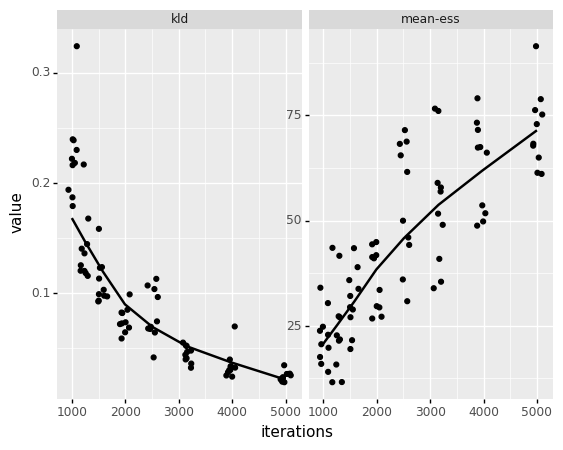

<ggplot: (8767811732336)>

In [24]:
(ggplot(df,
        aes(x='iterations', y='value')) +
 geom_jitter(width=100) +
 geom_smooth(stat='smooth', se=False) +
 facet_wrap('variable', scales='free'))